In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_text
from matplotlib import pyplot
from sklearn import metrics

# Loading the training and testing dataset

In [2]:
train_data=pd.read_csv("new_train.csv")
train_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [3]:
test_data=pd.read_csv("new_test.csv")
test_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,48,4,1,2,0,2,0,0,6,3,554,1,1
8234,30,7,2,3,0,2,0,0,6,0,159,1,1
8235,33,7,1,3,0,0,0,0,4,1,472,1,0
8236,44,1,1,1,0,2,2,1,6,1,554,5,1


In [4]:
# Checking for nan values in train data
train_data.isna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
train_data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [6]:
train_data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [8]:
train_data.shape

(32950, 16)

In [9]:
train_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
test_data.shape

(8238, 13)

In [11]:
test_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'],
      dtype='object')

<AxesSubplot:xlabel='y', ylabel='count'>

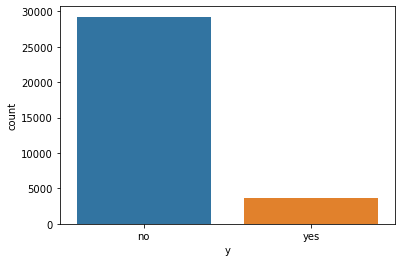

In [12]:
#checking the count of yes and no in the output level
sns.countplot(train_data['y'])

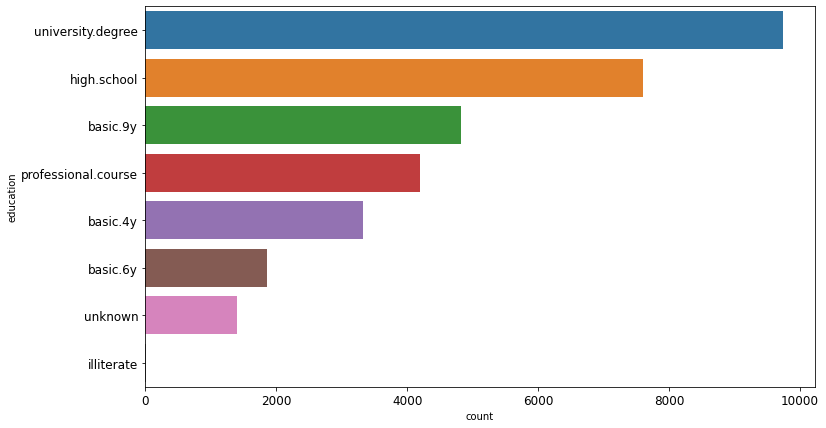

In [13]:
plt.figure(figsize=(12, 7))
g = sns.countplot(y ='education', data = train_data, order=train_data["education"].value_counts().index)
g.tick_params(labelsize=12)
plt.show()

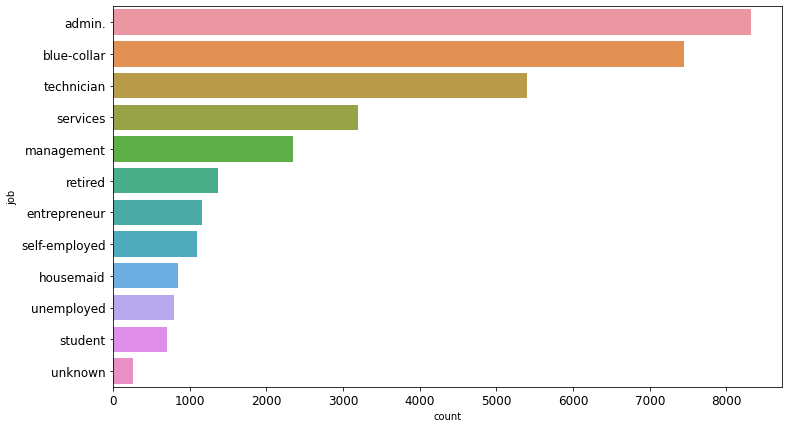

In [14]:
plt.figure(figsize=(12, 7))
g = sns.countplot(y ='job', data = train_data, order=train_data["job"].value_counts().index)
g.tick_params(labelsize=12)
plt.show()

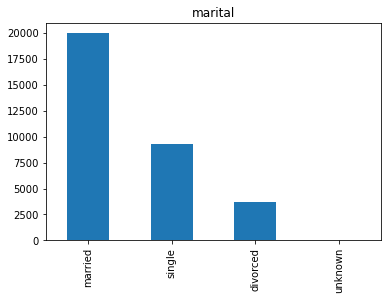

In [15]:
train_data['marital'].value_counts().plot(kind="bar")
plt.title('marital')
plt.show()

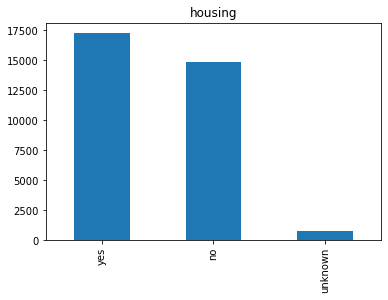

In [16]:
train_data['housing'].value_counts().plot(kind="bar")
plt.title('housing')
plt.show()

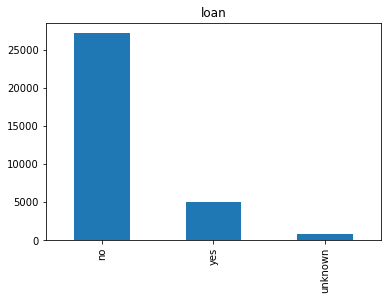

In [17]:
train_data['loan'].value_counts().plot(kind="bar")
plt.title('loan')
plt.show()

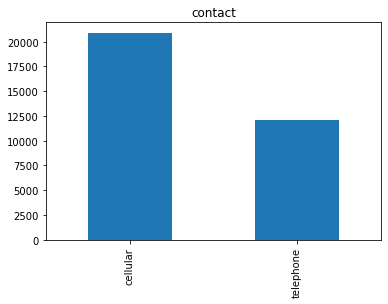

In [18]:
train_data['contact'].value_counts().plot(kind="bar")
plt.title('contact')
plt.show()

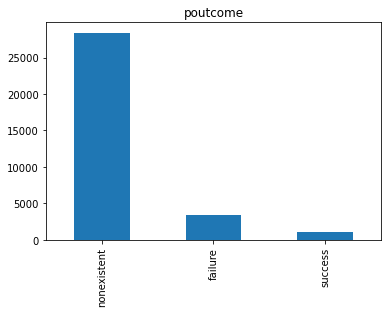

In [19]:
train_data['poutcome'].value_counts().plot(kind="bar")
plt.title('poutcome')
plt.show()

# Data Preprocessing:

In [20]:
# checking for duplicate records
train_data.duplicated().sum()

8

In [21]:
print(len(train_data))

32950


In [22]:
#droping duplicate records
train_data1= train_data.drop_duplicates()
len(train_data1)

32942

In [23]:
#droping Unwanted columns
train_data=train_data.drop(["previous", "pdays"], axis = 1)
train_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,nonexistent,no


age            AxesSubplot(0.125,0.536818;0.352273x0.343182)
duration    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
campaign          AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

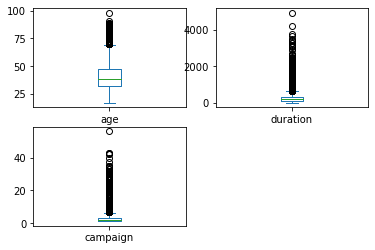

In [24]:
train_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>, <AxesSubplot:>]],
      dtype=object)

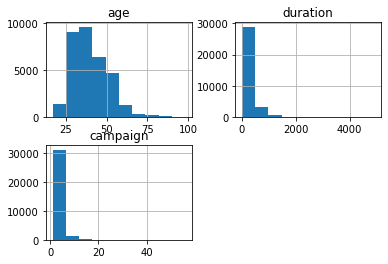

In [25]:
train_data.hist()

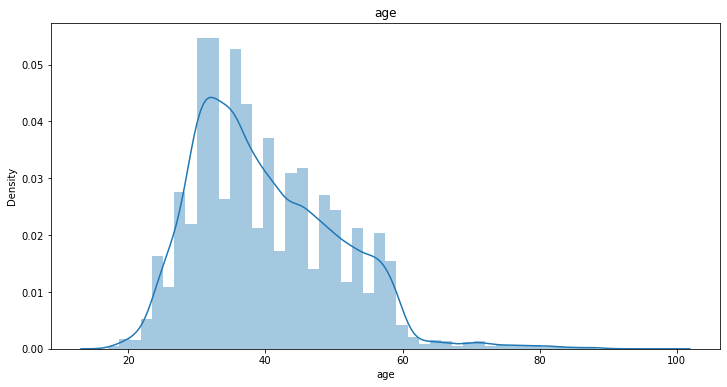

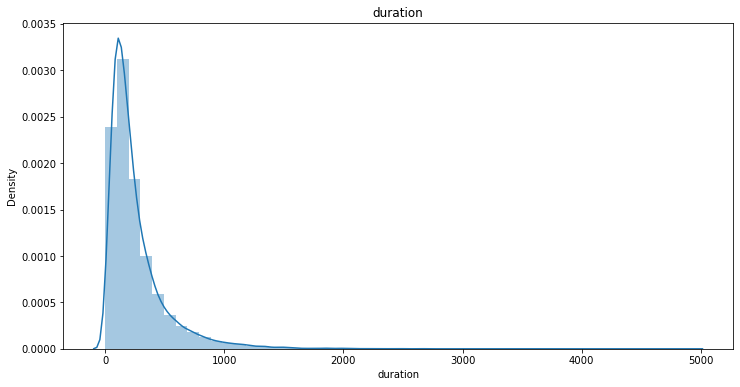

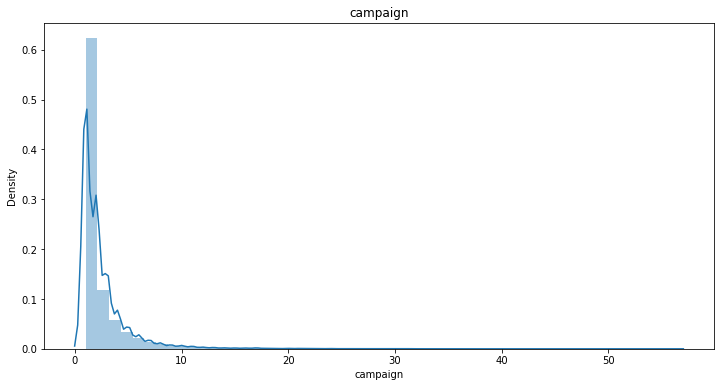

In [26]:
for i in ["age", "duration", "campaign"]:
    plt.figure(figsize=(12,6))
    sns.distplot(train_data[i], kde=True)
    plt.title(i)

# Features Selection


In [27]:
selected_columns = list(train_data.select_dtypes(include='object').columns)
selected_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [28]:
type(selected_columns)

list

In [29]:
# now removing the output column that is y using slicing operation
selected_columns= selected_columns[:-1]
selected_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [30]:
train_data['y'] = train_data['y'].apply(lambda x: 0 if x == "yes" else 1)
train_data['y']

0        1
1        1
2        0
3        1
4        1
        ..
32945    1
32946    1
32947    1
32948    1
32949    1
Name: y, Length: 32950, dtype: int64

In [31]:
train_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,1
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,1
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,nonexistent,0
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,1
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,nonexistent,1
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,failure,1
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,nonexistent,1
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,nonexistent,1


In [32]:
#similarly now we have to convert the charcter data to numric
for i in selected_columns:
    train_data[i]= train_data[i].astype('category')
    train_data[i]= train_data[i].cat.codes
    train_data[i]= train_data[i].astype('float64')

In [33]:
train_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1.0,1.0,2.0,1.0,0.0,0.0,0.0,7.0,4.0,227,4,1.0,1
1,37,2.0,1.0,6.0,0.0,0.0,0.0,1.0,7.0,4.0,202,2,0.0,1
2,78,5.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1148,1,1.0,0
3,36,0.0,1.0,6.0,0.0,2.0,0.0,1.0,6.0,1.0,120,2,1.0,1
4,59,5.0,0.0,6.0,0.0,0.0,0.0,0.0,4.0,3.0,368,2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7.0,2.0,3.0,0.0,2.0,0.0,0.0,3.0,3.0,192,1,1.0,1
32946,52,9.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,64,1,0.0,1
32947,54,0.0,1.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0,131,4,1.0,1
32948,29,0.0,1.0,6.0,0.0,0.0,0.0,1.0,6.0,0.0,165,1,1.0,1


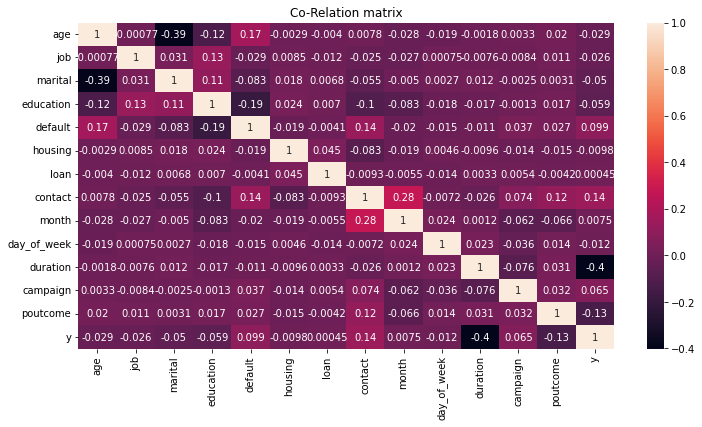

<Figure size 864x360 with 0 Axes>

In [34]:
plt.figure(figsize=(12, 6))
co_relation_matrix = train_data.corr()
plt.title("Co-Relation matrix")
sns.heatmap(co_relation_matrix,annot=True) 
plt.figure(figsize=(12,5))
plt.show()

In [35]:
for i in train_data.columns:
    print(i)

age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
poutcome
y


In [36]:
train_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1.0,1.0,2.0,1.0,0.0,0.0,0.0,7.0,4.0,227,4,1.0,1
1,37,2.0,1.0,6.0,0.0,0.0,0.0,1.0,7.0,4.0,202,2,0.0,1
2,78,5.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1148,1,1.0,0
3,36,0.0,1.0,6.0,0.0,2.0,0.0,1.0,6.0,1.0,120,2,1.0,1
4,59,5.0,0.0,6.0,0.0,0.0,0.0,0.0,4.0,3.0,368,2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7.0,2.0,3.0,0.0,2.0,0.0,0.0,3.0,3.0,192,1,1.0,1
32946,52,9.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,64,1,0.0,1
32947,54,0.0,1.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0,131,4,1.0,1
32948,29,0.0,1.0,6.0,0.0,0.0,0.0,1.0,6.0,0.0,165,1,1.0,1


In [37]:
from scipy.stats import ttest_1samp

In [38]:
train_data_mean = np.mean(train_data)
train_data_mean

age             40.014112
job              3.723369
marital          1.173354
education        3.748832
default          0.210804
housing          1.071442
loan             0.329044
contact          0.365463
month            4.233414
day_of_week      2.000546
duration       258.127466
campaign         2.560607
poutcome         0.929469
y                0.887344
dtype: float64

In [39]:
train_data_mean.mean()

22.812518968133535

In [87]:
tset, pval = ttest_1samp(train_data_mean,22.812518968133535)
print(tset)
print('p-values',pval)
if pval < 0.05: #alpha 0.05
   print(" rejecting null hypothesis")
else:
  print("accepting null hypothesis")

0.0
p-values 1.0
accepting null hypothesis


# Spliting the dataset into train and test


In [41]:
x= train_data.drop('y', axis=1)
y= train_data['y']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [43]:
y_train.value_counts()

1    21968
0     2744
Name: y, dtype: int64

In [44]:
clf1=DecisionTreeClassifier()
clf1

DecisionTreeClassifier()

In [45]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
y_prediction = clf1.predict(X_test)
y_prediction

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.47      0.46      0.46       968
           1       0.93      0.93      0.93      7270

    accuracy                           0.88      8238
   macro avg       0.70      0.69      0.70      8238
weighted avg       0.87      0.88      0.87      8238



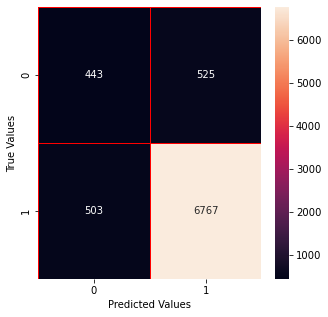

In [47]:
y_pred = clf1.predict(X_test)
confusion_mtx = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [48]:
print("f1_score:",f1_score(y_test,y_prediction, average="micro"))

f1_score: 0.8752124302015052


In [49]:
'''plt.figure(figsize=(12, 6))
tree.plot_tree(clf1, filled=True)
plt.show()'''

'plt.figure(figsize=(12, 6))\ntree.plot_tree(clf1, filled=True)\nplt.show()'

# As the data is not balace using smote for oversampling and validating the on train dataset

In [50]:
train_data2=train_data.copy()

In [51]:
train_data2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1.0,1.0,2.0,1.0,0.0,0.0,0.0,7.0,4.0,227,4,1.0,1
1,37,2.0,1.0,6.0,0.0,0.0,0.0,1.0,7.0,4.0,202,2,0.0,1
2,78,5.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1148,1,1.0,0
3,36,0.0,1.0,6.0,0.0,2.0,0.0,1.0,6.0,1.0,120,2,1.0,1
4,59,5.0,0.0,6.0,0.0,0.0,0.0,0.0,4.0,3.0,368,2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7.0,2.0,3.0,0.0,2.0,0.0,0.0,3.0,3.0,192,1,1.0,1
32946,52,9.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,64,1,0.0,1
32947,54,0.0,1.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0,131,4,1.0,1
32948,29,0.0,1.0,6.0,0.0,0.0,0.0,1.0,6.0,0.0,165,1,1.0,1


In [52]:
x1= train_data2.drop('y', axis=1)
y1= train_data2['y']

In [53]:
x1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,49,1.0,1.0,2.0,1.0,0.0,0.0,0.0,7.0,4.0,227,4,1.0
1,37,2.0,1.0,6.0,0.0,0.0,0.0,1.0,7.0,4.0,202,2,0.0
2,78,5.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1148,1,1.0
3,36,0.0,1.0,6.0,0.0,2.0,0.0,1.0,6.0,1.0,120,2,1.0
4,59,5.0,0.0,6.0,0.0,0.0,0.0,0.0,4.0,3.0,368,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7.0,2.0,3.0,0.0,2.0,0.0,0.0,3.0,3.0,192,1,1.0
32946,52,9.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,64,1,0.0
32947,54,0.0,1.0,2.0,0.0,0.0,2.0,0.0,3.0,1.0,131,4,1.0
32948,29,0.0,1.0,6.0,0.0,0.0,0.0,1.0,6.0,0.0,165,1,1.0


In [54]:
smt =SMOTE()
x_smt,y_smt = smt.fit_resample(x1, y1)

In [55]:
y_smt

0        1
1        1
2        0
3        1
4        1
        ..
58471    0
58472    0
58473    0
58474    0
58475    0
Name: y, Length: 58476, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x_smt, y_smt, test_size = 0.25)

In [57]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_prediction = clf1.predict(X_test)
y_prediction

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7375
           1       0.92      0.92      0.92      7244

    accuracy                           0.92     14619
   macro avg       0.92      0.92      0.92     14619
weighted avg       0.92      0.92      0.92     14619



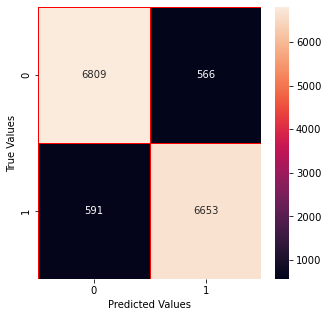

In [59]:
y_pred = clf1.predict(X_test)
confusion_mtx = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [60]:
# changing hyperparameter to observe the changes
clf2 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00000175).fit(X_train,y_train)
clf2

DecisionTreeClassifier(ccp_alpha=1.75e-06, random_state=0)

In [61]:
y_pred = clf2.predict(X_test)

In [62]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf2.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test)))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9211984403857993


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

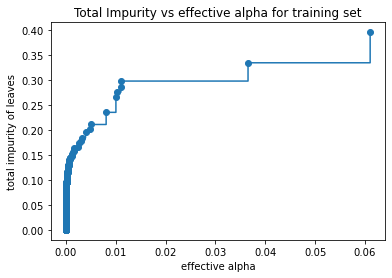

In [63]:
p = clf2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = p.ccp_alphas, p.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

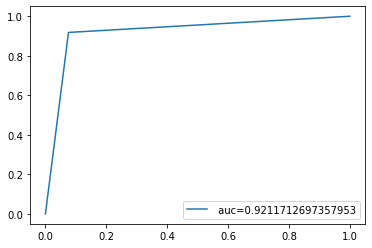

In [64]:
f, t, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(f,t,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [65]:
auc_value = np.trapz(t,f)
print('AUC:', auc_value)

AUC: 0.9211712697357953


In [66]:
feature_names=[]
for i in train_data2:
    feature_names.append(i)
feature_names=feature_names[:-1]
r = export_text(clf2, feature_names=feature_names) 
print(r)

|--- duration <= 249.50
|   |--- poutcome <= 1.00
|   |   |--- age <= 60.50
|   |   |   |--- month <= 7.00
|   |   |   |   |--- poutcome <= 1.00
|   |   |   |   |   |--- poutcome <= 0.00
|   |   |   |   |   |   |--- month <= 5.91
|   |   |   |   |   |   |   |--- month <= 0.05
|   |   |   |   |   |   |   |   |--- age <= 21.00
|   |   |   |   |   |   |   |   |   |--- duration <= 183.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- duration >  183.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- age >  21.00
|   |   |   |   |   |   |   |   |   |--- duration <= 191.50
|   |   |   |   |   |   |   |   |   |   |--- day_of_week <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- day_of_week >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- duration >  191.50
|   |   | 

# Perceptron

In [67]:
from sklearn.linear_model import Perceptron

In [68]:
ppn = Perceptron(eta0=0.1) # creating an object of perceptron

In [69]:
ppn.fit(X_train, y_train)# fitting the model

Perceptron(eta0=0.1)

In [70]:
y_pred = ppn.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 3420


In [71]:
print('Accuracy(test set): %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy (standardised test set): %.3f' % ppn.score(X_test, y_test))

Accuracy(test set): 0.766
Accuracy (standardised test set): 0.766


# Multilayered perceptron MLP


In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
clf_mlp1 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(5,), solver='adam', max_iter=100)
clf_mlp1

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), max_iter=100,
              random_state=0)

In [74]:
clf_mlp1.fit(X_train,y_train)


MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), max_iter=100,
              random_state=0)

In [75]:
clf_mlp_predict1 = clf_mlp1.predict(X_test)
print('acc for training data: {:.3f}'.format(clf_mlp1.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(clf_mlp1.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, clf_mlp_predict1))


acc for training data: 0.845
acc for test data: 0.847
MLP Classification report:

               precision    recall  f1-score   support

           0       0.85      0.84      0.85      7375
           1       0.84      0.85      0.85      7244

    accuracy                           0.85     14619
   macro avg       0.85      0.85      0.85     14619
weighted avg       0.85      0.85      0.85     14619



#### changing the max_itr to 500

In [76]:
clf_mlp2 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), solver='adam', max_iter=500)
clf_mlp2.fit(X_train,y_train)
clf_mlp_predict2 = clf_mlp2.predict(X_test)
print('acc for training data: {:.3f}'.format(clf_mlp2.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(clf_mlp2.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, clf_mlp_predict2))

acc for training data: 0.849
acc for test data: 0.851
MLP Classification report:

               precision    recall  f1-score   support

           0       0.85      0.85      0.85      7375
           1       0.85      0.85      0.85      7244

    accuracy                           0.85     14619
   macro avg       0.85      0.85      0.85     14619
weighted avg       0.85      0.85      0.85     14619



#### changing the max_itr to 1000

In [77]:
clf_mlp3 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), solver='adam', max_iter=1000)
clf_mlp3.fit(X_train,y_train)
clf_mlp_predict3 = clf_mlp3.predict(X_test)
print('acc for training data: {:.3f}'.format(clf_mlp3.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(clf_mlp3.score(X_test, y_test)))
print('MLP Classification report:\n\n', classification_report(y_test, clf_mlp_predict3))

acc for training data: 0.849
acc for test data: 0.851
MLP Classification report:

               precision    recall  f1-score   support

           0       0.85      0.85      0.85      7375
           1       0.85      0.85      0.85      7244

    accuracy                           0.85     14619
   macro avg       0.85      0.85      0.85     14619
weighted avg       0.85      0.85      0.85     14619



Baseline (random guess): ROC AUC=0.500
MLP 1 (hidden layer sizes=5): ROC AUC=0.925
MLP 2 (hidden layer sizes=10): ROC AUC=0.930
MLP 3 (hidden layer sizes=10): ROC AUC=0.930


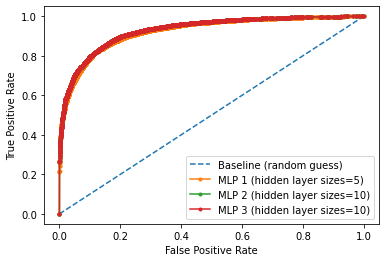

In [78]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]



# predict probabilities for different models
lr_probs1 = clf_mlp1.predict_proba(X_test)
lr_probs2 = clf_mlp2.predict_proba(X_test)
lr_probs3 = clf_mlp3.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3=lr_probs3[:, 1]

# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)

# summarize scores
print('Baseline (random guess): ROC AUC=%.3f' % (ns_auc))
print('MLP 1 (hidden layer sizes=5): ROC AUC=%.3f' % (lr_auc1))
print('MLP 2 (hidden layer sizes=10): ROC AUC=%.3f' % (lr_auc2))
print('MLP 3 (hidden layer sizes=10): ROC AUC=%.3f' % (lr_auc3))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='MLP 1 (hidden layer sizes=5)')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='MLP 2 (hidden layer sizes=10)')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='MLP 3 (hidden layer sizes=10)')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [80]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
y_pred = KNN.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7375
           1       0.99      0.76      0.86      7244

    accuracy                           0.88     14619
   macro avg       0.90      0.88      0.88     14619
weighted avg       0.90      0.88      0.88     14619



# naive bayes

In [82]:
from sklearn import naive_bayes
nv = naive_bayes.GaussianNB()
nv.fit(X_train,y_train)
y_pred1 = nv.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79      7375
           1       0.85      0.64      0.73      7244

    accuracy                           0.77     14619
   macro avg       0.78      0.77      0.76     14619
weighted avg       0.78      0.77      0.76     14619



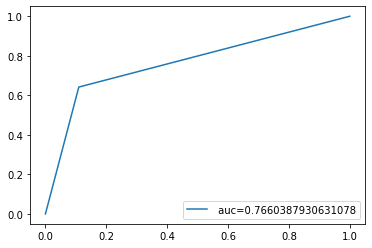

In [83]:
f, t, _ = metrics.roc_curve(y_test,  y_pred1)
auc = metrics.roc_auc_score(y_test, y_pred1)
plt.plot(f,t,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [84]:
nv1 = naive_bayes.BernoulliNB()
nv1.fit(X_train,y_train)
y_pred2 = nv1.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      7375
           1       0.69      0.64      0.67      7244

    accuracy                           0.68     14619
   macro avg       0.68      0.68      0.68     14619
weighted avg       0.68      0.68      0.68     14619



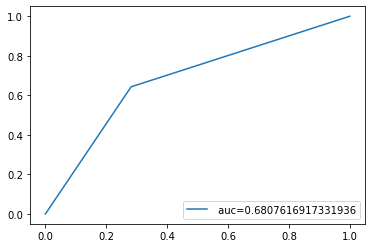

In [85]:
f, t, _ = metrics.roc_curve(y_test,  y_pred2)
auc = metrics.roc_auc_score(y_test, y_pred2)
plt.plot(f,t,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()